### 請解壓縮data.rar，取得本程式之數據

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import re
import random

In [2]:
word_list = np.load('./training_data/word_list.npy') # 包含 400000 個單詞
print('Loaded the word list')
word_list = word_list.tolist() # word_list包含了所有詞
word_list = [word.decode('utf-8') for word in word_list] # utf-8=>中文
word_list_dict = {}
for i , content in enumerate(word_list):
    word_list_dict[content] = i  

# 包含所有單詞向量值得 400000*50 維的詞嵌入矩陣
word_vector = np.load('./training_data/word_vector.npy') # 每個詞實際的向量(一個詞可以用50維向量來代表)
print ('Loaded the word vectors')

Loaded the word list
Loaded the word vectors


In [3]:
max_sql_size = 10 # 不足max_sql_size，就直接補0
sentence = ['i' , 'thought' , 'the' , 'movie'  ,'was' , 'incredible' , 'and' , 'inspiring']
index = np.zeros((max_sql_size) , dtype = 'int32')
for i in range(0 , len(sentence)):
    index[i] = word_list_dict[sentence[i]]
print('句子轉換成的index : {}'.format(index)) # 看一下整句句子的index

句子轉換成的index : [    41    804 201534   1005     15   7446      5  13767      0      0]


In [4]:
# 數據集使用的是IMDB電影影評
# 這個數據集包含25000條電影評論，其中12500條正面評論，12500條負面評論
positive_file = []
for f in os.listdir('./training_data/positiveReviews/'):
    if os.path.isfile(os.path.join('./training_data/positiveReviews/' , f)):
        positive_file.append('./training_data/positiveReviews/' + f)
negative_file = []
for f in os.listdir('./training_data/negativeReviews/'):
    if os.path.isfile(os.path.join('./training_data/negativeReviews' , f)):
        negative_file.append('./training_data/negativeReviews/' + f)
        
# 計算每個所有評論中的字數    
num_word = []
for pf in positive_file:
    f = open(pf , 'r' , encoding = 'utf-8')
    line = f.readline()
    counter = len(line.split())
    num_word.append(counter)       
print('Positive files finished')

for nf in negative_file:
    f = open(pf , 'r' , encoding = 'utf-8')
    line = f.readline()
    counter = len(line.split())
    num_word.append(counter)       
print('Negative files finished')

num_files = len(positive_file) + len(negative_file)
print('資料夾總數目 : {}'.format(num_files))
print('詞條總數目 : {}'.format(sum(num_word)))
print('每個資料夾平均的詞條數目 : {:.2f}'.format(sum(num_word)/len(num_word)))      

Positive files finished
Negative files finished
資料夾總數目 : 25000
詞條總數目 : 4921332
每個資料夾平均的詞條數目 : 196.85


150個字上下的評論是最多的

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text yticklabel objects>)

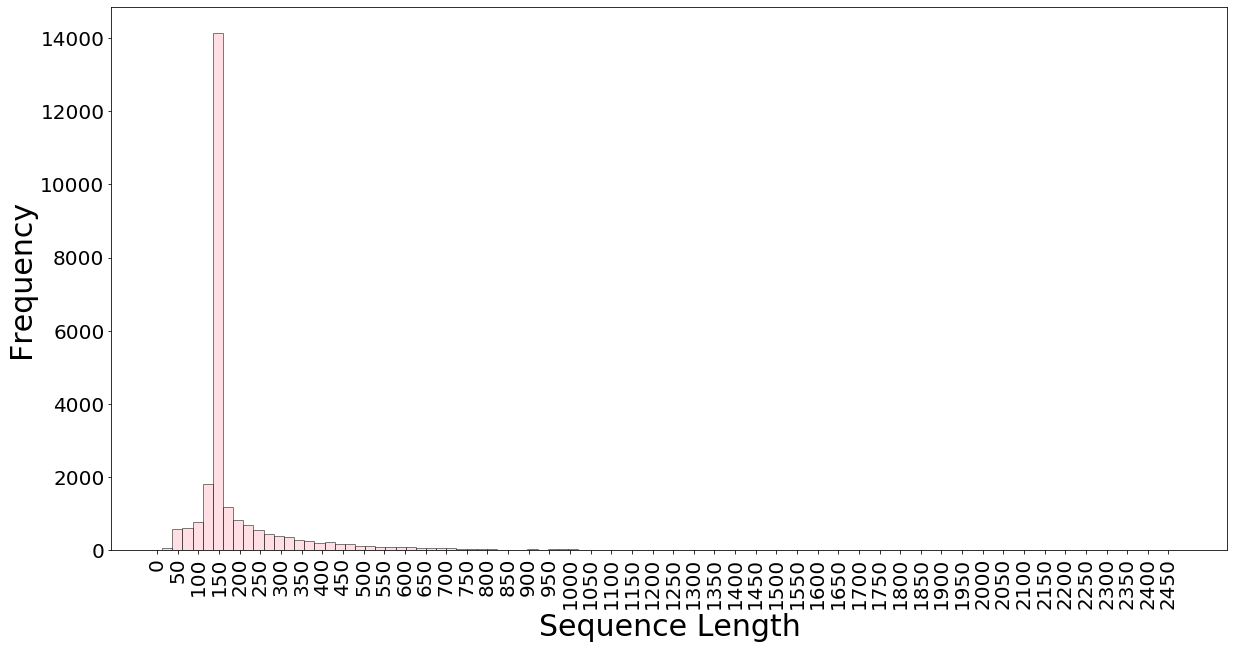

In [5]:
fig , ax = plt.subplots(1 , 1 , figsize = (20 , 10))
ax.hist(num_word , 100 , alpha = 0.5 , facecolor = 'pink' , edgecolor = 'black')
ax.set_xlabel('Sequence Length' , fontsize = 30)
ax.set_ylabel('Frequency' , fontsize = 30)
plt.xticks(np.arange(0 , 2500 , 50) , fontsize = 20 , rotation = 90)
plt.yticks(fontsize = 20)

In [6]:
# 看一下positive_file中的第1條評論長啥樣
fname = positive_file[1]
f = open(fname , 'r')
lines = f.readline()
print(lines)

Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they'll be next to end up on the streets.<br /><br />But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home, the entertainment sets, a bathroom, pictures on the wall, a computer, and everything you once treasure to see what it's like to be homeless? That is Goddard Bolt's lesson.<br /><br />Mel Brooks (who directs) who stars as Bolt plays a rich man who has everything in the world until deciding to make a bet with a sissy rival (Jeffery Tambor) to see if he can live in the streets for thirty days without th

In [7]:
# 刪除標點符號、括號、問號等，只留下字母、數字
def clean_sentence(string):
    string = string.lower().replace('<br />' , ' ')
    return re.sub('[^A-Za-z0-9 ]+' , '' , string.lower())

In [8]:
max_sql_size = 250
line = clean_sentence(lines)
clean_line = line.split(' ')
index_record = []
for i in range(0 , max_sql_size):
    if i < len(clean_line):
        if clean_line[i] in word_list_dict.keys():    
            index_record.append(word_list_dict[clean_line[i]])
        elif clean_line[i] not in word_list_dict.keys():
            index_record.append(word_list_dict['unk'])
    elif i > len(clean_line):   
        index_record.append(0) # 假如len(clean_line)大於max_sql_size，就補0
print(index_record) # 看一下positive_file中的第1條評論轉換而成的index是啥樣子     

[26494, 46, 399999, 19, 649, 29594, 2313, 31, 51, 29, 495, 10, 82, 34, 332, 7, 394, 4, 275, 155, 13, 201534, 491, 12, 35, 442, 834, 473, 38, 119, 1174, 25, 222, 4, 164, 161, 46, 538, 10, 201534, 1120, 96, 69, 269, 3, 201534, 5473, 19, 120, 7, 402, 1157, 110, 10394, 59, 654, 125, 19, 7551, 201534, 136, 13, 233, 16097, 1813, 4, 4372, 732, 201534, 613, 1597, 46, 10394, 83, 399999, 30, 182, 4, 156, 60, 13, 201534, 1736, 399999, 34, 102, 83, 81, 35, 454, 7, 5670, 4, 682, 13, 201534, 1736, 10, 7, 229, 296, 201534, 38220, 81, 442, 40, 25, 7, 163, 201534, 2045, 2303, 7, 9515, 2490, 13, 201534, 1015, 7, 951, 5, 1174, 81, 442, 9013, 4, 253, 102, 47, 117, 4, 30, 5473, 12, 14, 22637, 18906, 6557, 399999, 10464, 6469, 38, 14719, 38, 1569, 19, 11869, 1381, 7, 1727, 300, 38, 31, 1174, 6, 201534, 85, 207, 6070, 4, 159, 7, 5670, 17, 7, 45361, 1745, 36621, 87857, 4, 253, 83, 18, 86, 682, 6, 201534, 1736, 10, 6423, 249, 296, 201534, 38220, 83, 11869, 14014, 18, 86, 88, 102, 18, 1025, 17, 7, 581, 716, 3, 

## 將所有評論數據轉為index，會花很多時間，可以直接讀取training_data中的idsMatrix.npy

In [9]:
# ids = ids.astype(np.int32)
# file_counter = 0
# # 處理正面評論
# ids_positive = np.zeros([num_files / 2 , max_sql_size])
# ids_positive = ids_positive.astype(np.int32)
# for file_counter , pf in enumerate(positive_file):
#     f = open(pf , 'r' , encoding = 'utf-8')
#     line = f.readline()
#     clean_line = clean_sentence(line)
#     split = clean_line.split()
#     index_counter = 0
#     for word in split:
#         if word in word_list_dict.keys():   
#             ids_positive[file_counter , index_counter] = word_list_dict[word] # 取得評論中所有詞的index
#         elif word not in word_list_dict.keys(): 
#             ids_positive[file_counter , index_counter] = word_list_dict['unk'] # 若評論中詞沒有出現在word_list_dict中，則用word_list_dict['unk']來當index
#         index_counter = index_counter + 1
#         if index_counter >= max_sql_size:
#             break

# # 處理負面評論
# ids_negative = np.zeros([num_files / 2 , max_sql_size])
# ids_negative = ids_negative.astype(np.int32)
# for file_counter , nf in enumerate(negative_file):
#     f = open(nf , 'r' , encoding = 'utf-8')
#     line = f.readline()
#     clean_line = clean_sentence(line)
#     split = clean_line.split()
#     index_counter = 0
#     for word in split:
#         if word in word_list_dict.keys():   
#             ids[file_counter , index_counter] = word_list_dict[word] # 取得評論中所有詞的index
#         elif word not in word_list_dict.keys(): 
#             ids[file_counter , index_counter] = word_list_dict['unk'] # 若評論中詞沒有出現在word_list_dict中，則用word_list_dict['unk']來當index
#         index_counter = index_counter + 1
#         if index_counter >= max_sql_size:
#             break
            
# ids = np.concatenate([ids_positive , ids_negative] , axis = 0) # 所有句子轉換成的code都存在ids
# np.save('idsMatrix' , ids)

ids = np.load('./training_data/idsMatrix.npy')

In [10]:
# hyperparameter
batch_size = 24
lstm_units = 64
num_class = 2
num_layers = 1
iteration = 50000

In [11]:
# 一個batch共24筆評論，12筆正面評論，12筆負面評論
def get_train_batch(shuffle = False):
    if shuffle == False:
        # 隨機取樣出12筆正面評論
        positive_index = random.sample(range(0 , 11500) , int(batch_size / 2))
        poditive_data = ids[positive_index , :]
        positive_labels = [[1 , 0] for _ in range(0 , int(batch_size / 2))]
        
        # 隨機取樣出12筆負面評論
        negative_index = random.sample(range(13500 , 25000) , int(batch_size / 2))
        negative_data = ids[negative_index , :]
        negative_labels = [[0 , 1] for _ in range(0 , int(batch_size / 2))]
        
        arr = np.vstack([poditive_data , negative_data])
        labels = positive_labels + negative_labels
        
        return arr , labels
    
    if shuffle == True:
        arr_shuffle = np.zeros((1 , max_sql_size))
        labels_shffle = []
        while len(labels) > 0:
            select = random.sample(range(0 , len(labels)) , 1)[0]
            arr_shuffle = np.vstack([arr_shuffle , arr[select , :]])
            labels_shffle.append(labels[select])
            
            arr = np.delete(arr , select , 0)
            labels.pop(select)
        arr_shuffle = np.delete(arr_shuffle , 1 , 0)
        
        return arr_shuffle , labels_shffle

In [12]:
labels = tf.placeholder(tf.float32 , [None , num_class])
input_data = tf.placeholder(tf.int32 , [None , max_sql_size])
keep_prob = tf.placeholder(tf.float32)
embed_input = tf.nn.embedding_lookup(word_vector , input_data)

In [13]:
def lstm_cell(lstm_units):
    cell = tf.contrib.rnn.LSTMCell(lstm_units)
    return tf.contrib.rnn.DropoutWrapper(cell , output_keep_prob = keep_prob) 

mlstm_cell = tf.contrib.rnn.MultiRNNCell([lstm_cell(lstm_units) for _ in range(0 , num_layers)]) 
init_state = mlstm_cell.zero_state(batch_size , dtype = tf.float32)
outputs , states = tf.nn.dynamic_rnn(mlstm_cell , 
                                     inputs = embed_input ,
                                     initial_state = init_state , 
                                     dtype = tf.float32)

In [14]:
initializer = tf.contrib.layers.xavier_initializer()
weight = tf.Variable(initializer([max_sql_size * lstm_units , num_class]))
bias = tf.Variable(tf.constant(0.0001 , shape = [num_class]))

outputs = tf.reshape(outputs , [batch_size , -1])
outputs = tf.matmul(outputs , weight) + bias
outputs = tf.nn.dropout(outputs , keep_prob)
prediction = tf.nn.softmax(outputs)
correctPred = tf.equal(tf.argmax(prediction , 1) , tf.argmax(labels , 1))
accuracy = tf.reduce_mean(tf.cast(correctPred , tf.float32))

cross_entropy_temp = -tf.reduce_sum(labels * tf.log(prediction + 1e-9) , axis = 1)
cross_entropy = tf.reduce_mean(cross_entropy_temp)
#cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = outputs , labels = labels))
train_op = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(0 , iteration):
    x_batch , y_batch = get_train_batch()
    sess.run(train_op , feed_dict = {input_data: x_batch , labels: y_batch , keep_prob : 0.85})
    
    if i % 500 == 0:
        train_loss , train_accuracy = sess.run([cross_entropy , accuracy] , 
                                               feed_dict = {input_data: x_batch , labels: y_batch , keep_prob : 1})        
        
        # 隨機取樣驗證集評論數據與標籤
        positive_index = random.sample(range(11499 , 12500) , int(batch_size / 2))
        x_positive_val = ids[positive_index , :]
        y_positive_val = [[1 , 0] for _ in range(0 , int(batch_size / 2))]
        negative_index = random.sample(range(12500 , 13500) , int(batch_size / 2))
        x_negative_val = ids[negative_index , :]
        y_negative_val = [[0 , 1] for _ in range(0 , int(batch_size / 2))]
        x_val = np.concatenate([x_positive_val , x_negative_val] , axis = 0) # 驗證集評論
        y_val = np.concatenate([y_positive_val , y_negative_val] , axis = 0) # 驗證集標籤      
        val_loss , val_accuracy = sess.run([cross_entropy , accuracy] ,
                                           feed_dict = {input_data: x_val , labels: y_val , keep_prob : 1})
        
        print('iteration : {}/{}'.format(i , iteration)) 
        print('train_loss : {:.2f} , train_accuracy : {:.2%}'.format(train_loss , train_accuracy))
        print('validation_loss : {:.2f} , validation_accuracy : {:.2%}\n'.format(val_loss , val_accuracy))

iteration : 0/50000
train_loss : 0.66 , train_accuracy : 70.83%
validation_loss : 0.71 , validation_accuracy : 58.33%

iteration : 500/50000
train_loss : 0.50 , train_accuracy : 75.00%
validation_loss : 0.56 , validation_accuracy : 66.67%

iteration : 1000/50000
train_loss : 0.54 , train_accuracy : 66.67%
validation_loss : 0.76 , validation_accuracy : 62.50%

iteration : 1500/50000
train_loss : 0.40 , train_accuracy : 79.17%
validation_loss : 0.46 , validation_accuracy : 79.17%

iteration : 2000/50000
train_loss : 0.35 , train_accuracy : 83.33%
validation_loss : 0.47 , validation_accuracy : 70.83%

iteration : 2500/50000
train_loss : 0.52 , train_accuracy : 66.67%
validation_loss : 0.42 , validation_accuracy : 79.17%

iteration : 3000/50000
train_loss : 0.55 , train_accuracy : 66.67%
validation_loss : 0.46 , validation_accuracy : 83.33%

iteration : 3500/50000
train_loss : 0.41 , train_accuracy : 87.50%
validation_loss : 0.70 , validation_accuracy : 70.83%

iteration : 4000/50000
train

iteration : 33500/50000
train_loss : 0.11 , train_accuracy : 95.83%
validation_loss : 0.49 , validation_accuracy : 83.33%

iteration : 34000/50000
train_loss : 0.23 , train_accuracy : 91.67%
validation_loss : 0.52 , validation_accuracy : 79.17%

iteration : 34500/50000
train_loss : 0.22 , train_accuracy : 91.67%
validation_loss : 0.33 , validation_accuracy : 83.33%

iteration : 35000/50000
train_loss : 0.25 , train_accuracy : 87.50%
validation_loss : 0.48 , validation_accuracy : 79.17%

iteration : 35500/50000
train_loss : 0.10 , train_accuracy : 95.83%
validation_loss : 0.27 , validation_accuracy : 83.33%

iteration : 36000/50000
train_loss : 0.15 , train_accuracy : 95.83%
validation_loss : 0.27 , validation_accuracy : 87.50%

iteration : 36500/50000
train_loss : 0.21 , train_accuracy : 87.50%
validation_loss : 0.54 , validation_accuracy : 79.17%

iteration : 37000/50000
train_loss : 0.08 , train_accuracy : 100.00%
validation_loss : 0.44 , validation_accuracy : 75.00%

iteration : 375